<a href="https://colab.research.google.com/github/maheshbangalkar/Case-Study/blob/main/Walmart_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Walmart - Confidence Interval and CLT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Walmart_Data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- We could see there are total 10 columns - 5 numerical and 5 categorical
- We need to change Marital Status from 0,1 values to Unmarried, Married

In [ ]:
df['Marital_Status'] = df['Marital_Status'].map({0 : 'Unmarried', 1: 'Married'})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.ndim

2

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

- We have total 550068 orders records, from which 414259 purchased by Male and 135809 purchased by Female.
- Male purchased more than 3 times compared to Female.
- Most of orders are from B category cities - 231173, then C category cities - 171175 and at last A category cities - 147720
- 3631 total number of different products were purchased by customers.

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
df.groupby('City_Category')['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

- We have total unique 5891 orders records, from which 4225 purchased by Male and 1666 purchased by Female.
- Male purchased approximately 3 times compared to Female.
- Most of orders are from C category cities - 3139, then B category cities - 1707 and at last A category cities - 1045

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
np.round(df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)*100,2)

value
variable                   value           
Age                        0-17        2.75
                           18-25      18.12
                           26-35      39.92
                           36-45      20.00
                           46-50       8.31
                           51-55       7.00
                           55+         3.91
City_Category              A          26.85
                           B          42.03
                           C          31.12
Gender                     F          24.69
                           M          75.31
Marital_Status             Married    40.97
                           Unmarried  59.03
Occupation                 0          12.66
                           1           8.62
                           2           4.83
                           3           3.21
                           4          13.15
                           5           2.21
                           6           3.70
                           7          10.75
                           8           0.28
                           9           1.14
                           10          2.35
                           11          2.11
                           12          5.67
                           13          1.40
                           14          4.96
                           15          2.21
                           16          4.61
                           17          7.28
                           18          1.20
                           19          1.54
                           20          6.10
Product_Category           1          25.52
                           2           4.34
                           3           3.67
                           4           2.14
                           5          27.44
                           6           3.72
                           7           0.68
                           8          20.71
                           9           0.07
                           10          0.93
                           11          4.42
                           12          0.72
                           13          1.01
                           14          0.28
                           15          1.14
                           16          1.79
                           17          0.11
                           18          0.57
                           19          0.29
                           20          0.46
Stay_In_Current_City_Years 0          13.53
                           1          35.24
                           2          18.51
                           3          17.32
                           4+         15.40

🎯 **Customers age distribution of purchase**

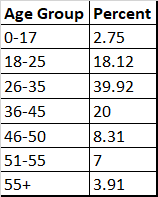

🎯 **City Category wise distribution of purchase**

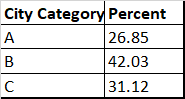

🎯 **Gender wise distribution of purchase**

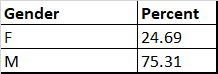

🎯 **Marital Status wise distribution of purchase**

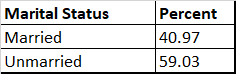

🎯 **Occupation wise distribution of purchase**

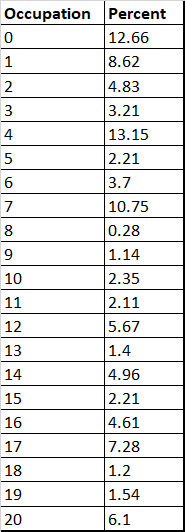

🎯 **Product Category wise distribution of purchase**

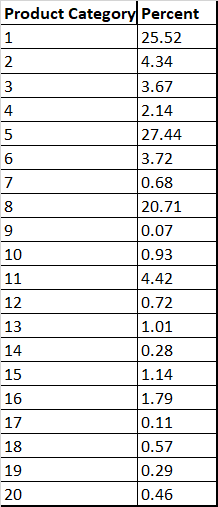

🎯 **Stay in Current City (Years) wise distribution of purchase**

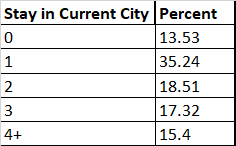

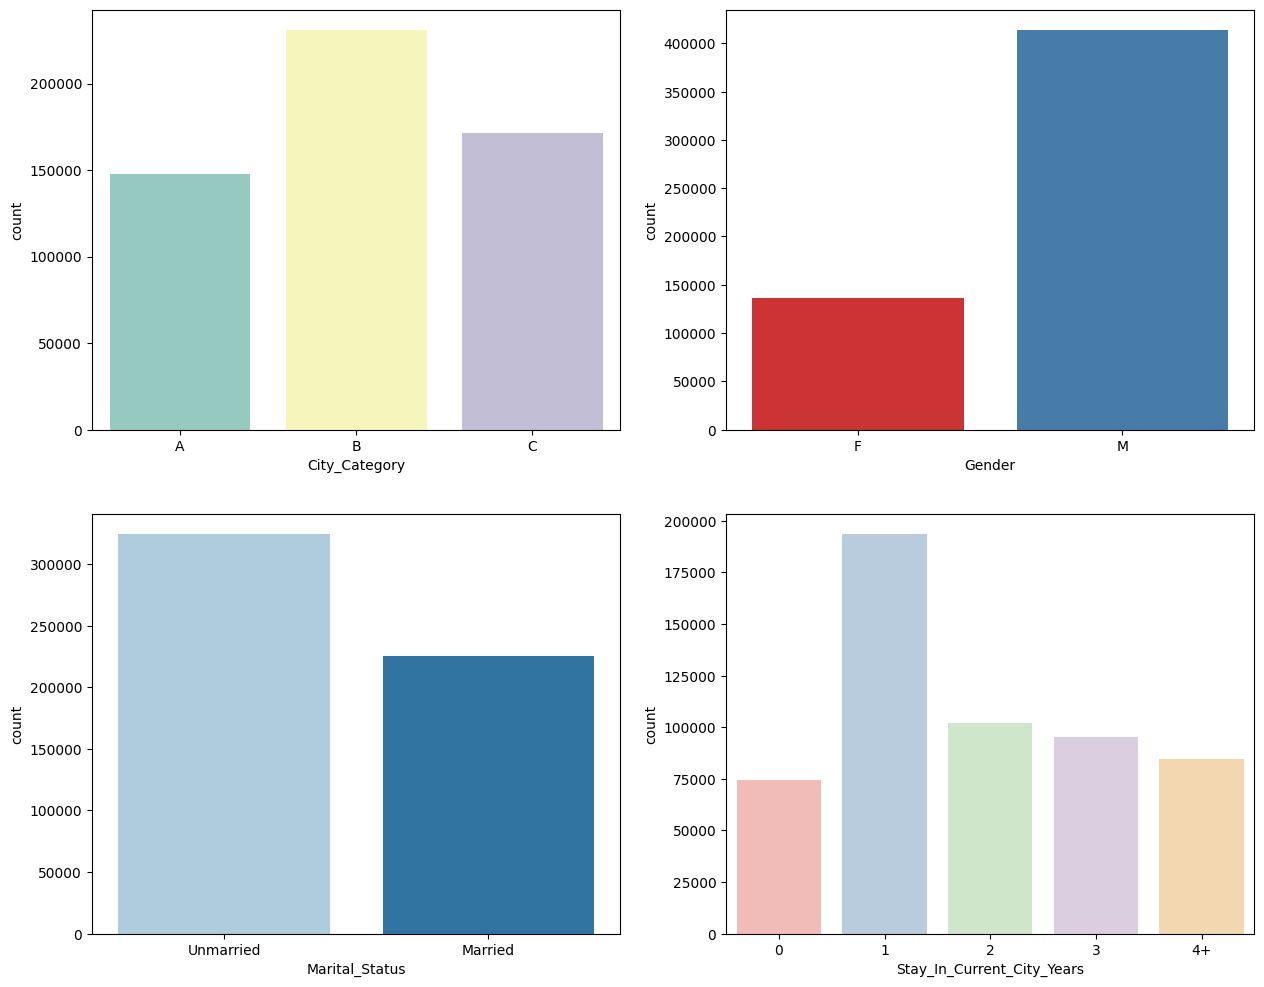

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,1], palette='Set1')
sns.countplot(data=df, x='City_Category', ax=axs[0,0],order=['A','B','C'], palette='Set3')
sns.countplot(data=df, x='Marital_Status', ax=axs[1,0], palette='Paired')
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axs[1,1], order=['0','1','2','3','4+'], palette='Pastel1')
plt.show()

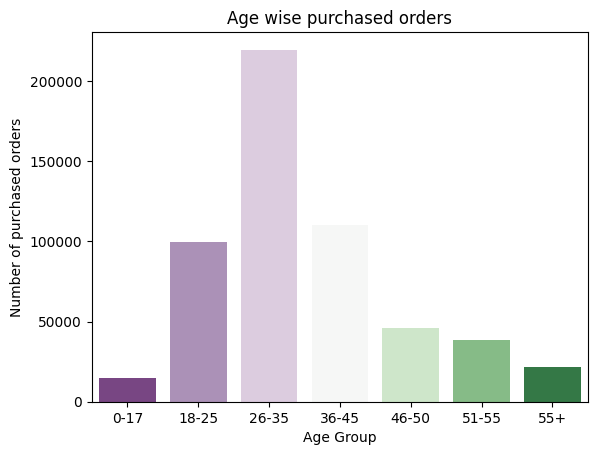

In [ ]:
count = df.groupby('Age')['User_ID'].count()
sns.barplot(data=count, palette='PRGn')
plt.title("Age wise purchased orders")
plt.xlabel('Age Group')
plt.ylabel('Number of purchased orders')
plt.show()

- We could see that majority of the Age of user category falls under the 18-25,26-35, 36-45. out of which Age 26-35 has the highest number of users.
- The age category 0-17 and 55+ has the least number of the users

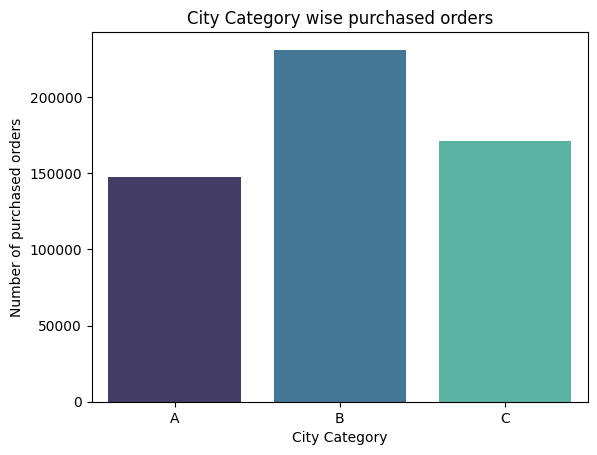

In [ ]:
count = df.groupby('City_Category')['User_ID'].count()
sns.barplot(data=count, palette='mako')
plt.title("City Category wise purchased orders")
plt.xlabel('City Category')
plt.ylabel('Number of purchased orders')
plt.show()

- We could see that City category B have the highest number of users, then City category C.
- The City category A have the least number of the users

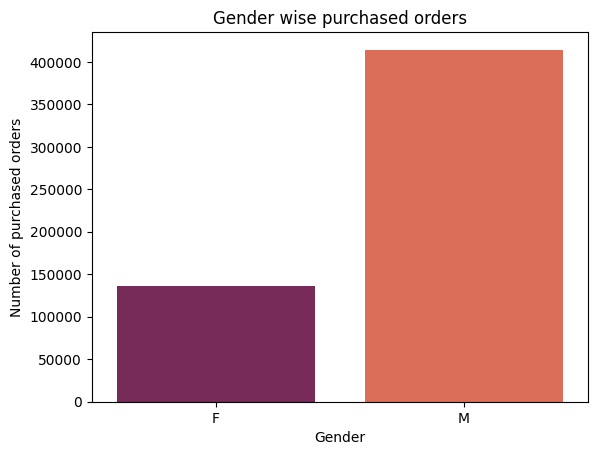

In [ ]:
count = df.groupby('Gender')['User_ID'].count()
sns.barplot(data=count, palette='rocket')
plt.title("Gender wise purchased orders")
plt.xlabel('Gender')
plt.ylabel('Number of purchased orders')
plt.show()

- We could see that Male gender have the highest number of users, most of orders are purchased by male.
- The female gender count is 3 times less than male count.

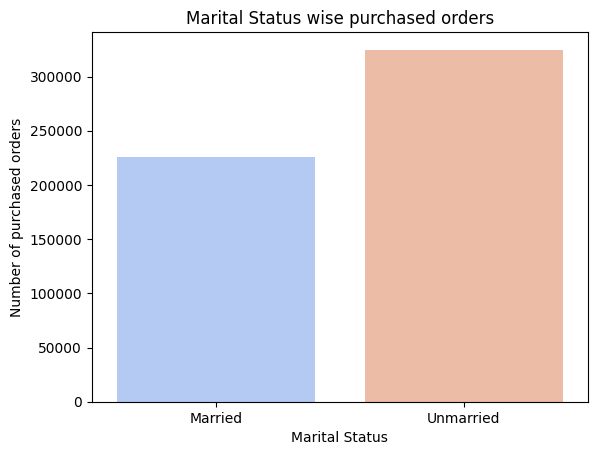

In [ ]:
count = df.groupby('Marital_Status')['User_ID'].count()
sns.barplot(data=count, palette='coolwarm')
plt.title("Marital Status wise purchased orders")
plt.xlabel('Marital Status')
plt.ylabel('Number of purchased orders')
plt.show()

- We could see that Unmarried customer purchased more orders than Married peoples.
- Married people puchased approximately 1/4 of Unmarried people less in numbers.

In [ ]:
df.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- No null records are available in dataset

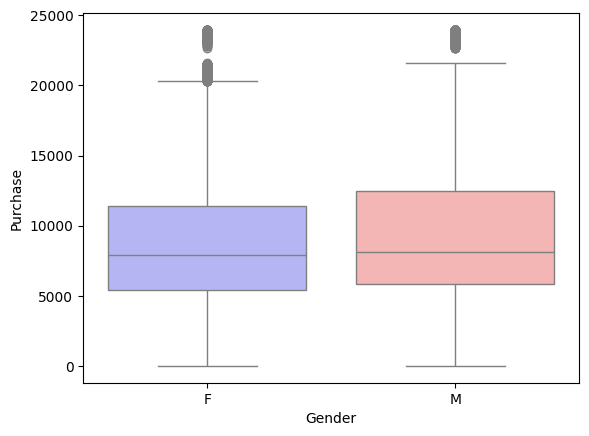

In [ ]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df, palette='bwr')
plt.show()

In [ ]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [ ]:
df[df['Gender'] == 'M'].describe()

,User_ID,Occupation,Product_Category,Purchase
count,4.142590e+05,414259.00000,414259.000000,414259.00000
mean,1.002996e+06,8.51475,5.301512,9437.52604
std,1.706494e+03,6.55379,4.006275,5092.18621
min,1.000002e+06,0.00000,1.000000,12.00000
25%,1.001505e+06,3.00000,1.000000,5863.00000
50%,1.003041e+06,7.00000,5.000000,8098.00000
75%,1.004411e+06,15.00000,8.000000,12454.00000
max,1.006040e+06,20.00000,20.000000,23961.00000


In [ ]:
df[df['Gender'] == 'F'].describe()

,User_ID,Occupation,Product_Category,Purchase
count,1.358090e+05,135809.000000,135809.000000,135809.000000
mean,1.003130e+06,6.740540,5.717714,8734.565765
std,1.786631e+03,6.239639,3.696752,4767.233289
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,3.000000,5433.000000
50%,1.003159e+06,4.000000,5.000000,7914.000000
75%,1.004765e+06,11.000000,8.000000,11400.000000
max,1.006039e+06,20.000000,20.000000,23959.000000


To find the outliers
1.   Calculate Inter-Quartile-Range.
```
Interquartile range (Q2) = Upper Quartile (Q3) - Lower Quartile (Q1)
where,
IQR = Interquartile range (IQR = Q2)
Q1 = (1/4)[(n + 1)]th term)
Q3 = (3/4)[(n + 1)]th term)
n = number of data points
```



A commonly used rule says that a data point is an outlier if it is more than **1.5 x IQR**  above the third quartile or below the first quartile. Said differently, low outliers are below **Q1 - 1.5 x IQR** and high outliers are above **Q 3 + 1.5 x IQR**

**Male Outliers**

In [ ]:
Q1 = 5863
Q3 = 12454
IQR = Q3 - Q1
Male_Upper_Fence = Q3 + 1.5 * IQR
Male_Lower_Fence = Q1 - 1.5 * IQR
print(f"IQR : {IQR}")
print(f"Upper Fence (Male) : {Male_Upper_Fence}")
print(f"Lower Fence (Male) : {Male_Lower_Fence}")

IQR : 6591
Upper Fence (Male) : 22340.5
Lower Fence (Male) : -4023.5


In [ ]:
df.loc[(df['Gender'] == 'M') & (df['Purchase'] > Male_Upper_Fence)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
1445,1000235,P00116142,M,26-35,0,B,0,Unmarried,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,Unmarried,10,23139
3166,1000523,P00117642,M,51-55,7,A,1,Married,10,23159
...,...,...,...,...,...,...,...,...,...,...
543995,1005757,P00052842,M,0-17,10,C,2,Unmarried,10,23945
544417,1005811,P00117642,M,18-25,4,B,3,Unmarried,10,23284
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


**Female Outliers**

In [ ]:
Q1 = 5433
Q3 = 11400
IQR = Q3 - Q1
Female_Upper_Fence = Q3 + 1.5 * IQR
Female_Lower_Fence = Q1 - 1.5 * IQR
print(f"IQR : {IQR}")
print(f"Upper Fence (Female) : {Female_Upper_Fence}")
print(f"Lower Fence (Female) : {Female_Lower_Fence}")

IQR : 5967
Upper Fence (Female) : 20350.5
Lower Fence (Female) : -3517.5


In [ ]:
df.loc[(df['Gender'] == 'F') & (df['Purchase'] > Female_Upper_Fence)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
731,1000139,P00020142,F,26-35,20,C,2,Unmarried,7,21002
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
1106,1000187,P00247642,F,46-50,1,B,1,Unmarried,7,20771
...,...,...,...,...,...,...,...,...,...,...
545461,1005972,P00255842,F,26-35,20,B,0,Unmarried,16,20634
545618,1005997,P00121042,F,26-35,7,A,3,Unmarried,15,20743
545834,1006029,P00327342,F,26-35,1,C,1,Married,16,20616
545856,1006036,P00279742,F,26-35,15,B,4+,Married,16,20766


## **Male v/s Female**

In [ ]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
avg_male = df_male['Purchase'].mean()
avg_female = df_female['Purchase'].mean()
print("Average amount spend per transaction by Male customers : {:.2f}".format(avg_male))
print("Average amount spend per transaction by Female customers : {:.2f}".format(avg_female))

Average amount spend per transaction by Male customers : 9437.53
Average amount spend per transaction by Female customers : 8734.57


In [ ]:
def female_data_sample():
  female_data = np.array(df_female['Purchase'].values)
  samples = random.sample(range(0, female_data.shape[0]),100)
  return female_data[samples].mean()

def male_data_sample():
  male_data = np.array(df_male['Purchase'].values)
  samples = random.sample(range(0, male_data.shape[0]),100)
  return male_data[samples].mean()

In [ ]:
female_mean = []
male_mean = []

for i in range(1000):
  female_mean.append(female_data_sample())
  male_mean.append(male_data_sample())

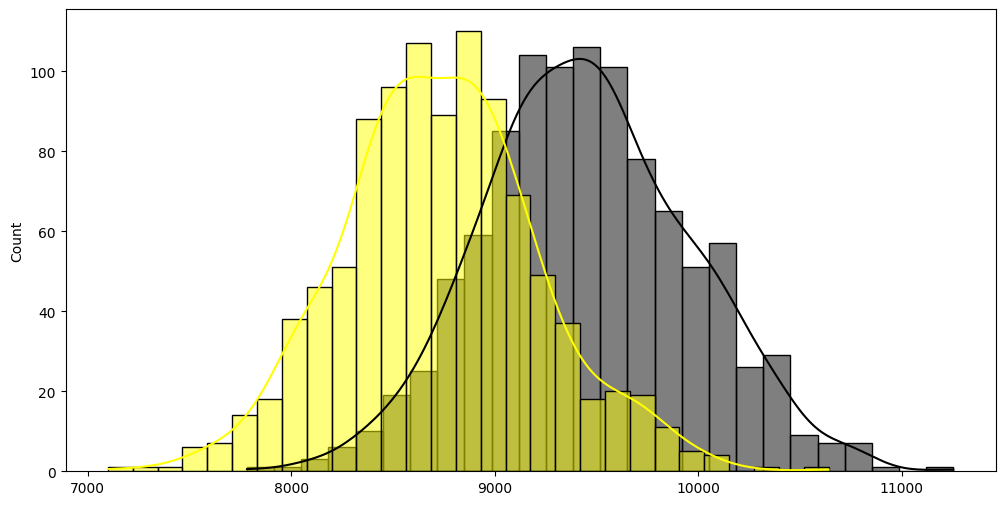

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x=male_mean, color='black', kde=True)
sns.histplot(x=female_mean, color='yellow', kde=True)
plt.show()

In [ ]:
female_x = np.round(np.mean(female_mean),2)
male_x = np.round(np.mean(male_mean),2)
print("Sample mean of female = {}".format(female_x))
print("Sample mean of male = {}".format(male_x))

Sample mean of female = 8733.44
Sample mean of male = 9453.69


**Calculating 90% confidence interval**

In [ ]:
male_lower_lim = df_male['Purchase'].mean() - 1.64 * df_male['Purchase'].std()/np.sqrt(len(df_male))
male_upper_lim = df_male['Purchase'].mean() + 1.64 * df_male['Purchase'].std()/np.sqrt(len(df_male))
female_lower_lim = df_female['Purchase'].mean() - 1.64 * df_female['Purchase'].std()/np.sqrt(len(df_female))
female_upper_lim = df_female['Purchase'].mean() + 1.64 * df_female['Purchase'].std()/np.sqrt(len(df_female))

In [ ]:
print("({:.2f}, {:.2f}) covers 90% of the values of the average spending of all female customers".format(female_lower_lim, female_upper_lim))
print("({:.2f}, {:.2f}) covers 90% of the values of the average spending of all male customers".format(male_lower_lim, male_upper_lim))

(8713.35, 8755.78) covers 90% of the values of the average spending of all female customers
(9424.55, 9450.50) covers 90% of the values of the average spending of all male customers


**Calculating 95% confidence interval**

In [ ]:
male_lower_lim = df_male['Purchase'].mean() - 1.96 * df_male['Purchase'].std()/np.sqrt(len(df_male))
male_upper_lim = df_male['Purchase'].mean() + 1.96 * df_male['Purchase'].std()/np.sqrt(len(df_male))
female_lower_lim = df_female['Purchase'].mean() - 1.96 * df_female['Purchase'].std()/np.sqrt(len(df_female))
female_upper_lim = df_female['Purchase'].mean() + 1.96 * df_female['Purchase'].std()/np.sqrt(len(df_female))

In [ ]:
print("({:.2f}, {:.2f}) covers 95% of the values of the average spending of all female customers".format(female_lower_lim, female_upper_lim))
print("({:.2f}, {:.2f}) covers 95% of the values of the average spending of all male customers".format(male_lower_lim, male_upper_lim))

(8709.21, 8759.92) covers 95% of the values of the average spending of all female customers
(9422.02, 9453.03) covers 95% of the values of the average spending of all male customers


**Calculating 99% confidence interval**

In [ ]:
male_lower_lim = df_male['Purchase'].mean() - 2.58 * df_male['Purchase'].std()/np.sqrt(len(df_male))
male_upper_lim = df_male['Purchase'].mean() + 2.58 * df_male['Purchase'].std()/np.sqrt(len(df_male))
female_lower_lim = df_female['Purchase'].mean() - 2.58 * df_female['Purchase'].std()/np.sqrt(len(df_female))
female_upper_lim = df_female['Purchase'].mean() + 2.58 * df_female['Purchase'].std()/np.sqrt(len(df_female))

In [ ]:
print("({:.2f}, {:.2f}) covers 99% of the values of the average spending of all female customers".format(female_lower_lim, female_upper_lim))
print("({:.2f}, {:.2f}) covers 99% of the values of the average spending of all male customers".format(male_lower_lim, male_upper_lim))

(8701.19, 8767.94) covers 99% of the values of the average spending of all female customers
(9417.11, 9457.94) covers 99% of the values of the average spending of all male customers


## **Married v/s Unmarried**

In [ ]:
df_married = df[df['Marital_Status'] == 'Married']
df_unmarried = df[df['Marital_Status'] == 'Unmarried']
avg_married = df_married['Purchase'].mean()
avg_unmarried = df_unmarried['Purchase'].mean()
print("Average amount spend per transaction by Married customers : {:.2f}".format(avg_married))
print("Average amount spend per transaction by Unmarried customers : {:.2f}".format(avg_unmarried))

Average amount spend per transaction by Married customers : 9261.17
Average amount spend per transaction by Unmarried customers : 9265.91


In [ ]:
def unmarried_data_sample():
  unmarried_data = np.array(df_unmarried['Purchase'].values)
  samples = random.sample(range(0, unmarried_data.shape[0]),100)
  return unmarried_data[samples].mean()

def married_data_sample():
  married_data = np.array(df_married['Purchase'].values)
  samples = random.sample(range(0, married_data.shape[0]),100)
  return married_data[samples].mean()

In [ ]:
married_mean = []
unmarried_mean = []

for i in range(1000):
  married_mean.append(married_data_sample())
  unmarried_mean.append(unmarried_data_sample())

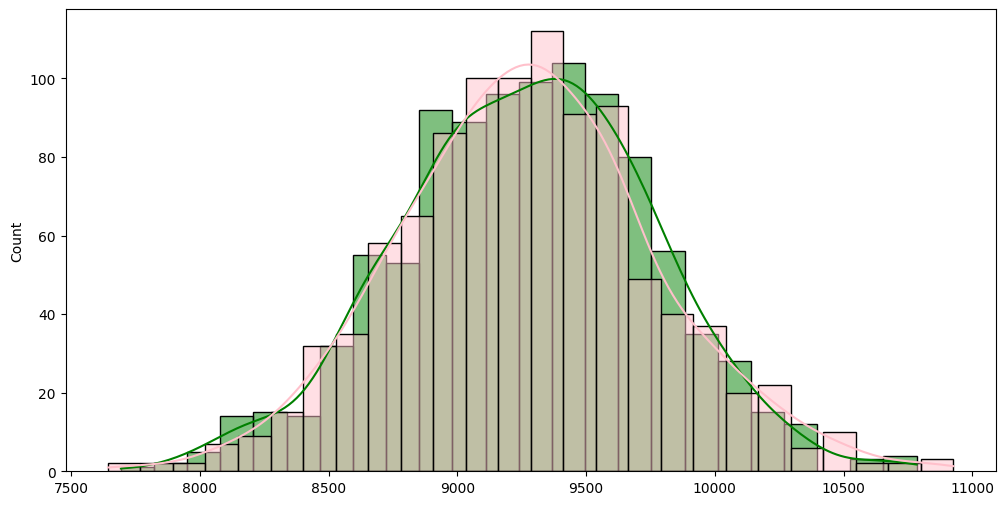

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x=married_mean, color='green', kde=True)
sns.histplot(x=unmarried_mean, color='pink', kde=True)
plt.show()

- From these two distributions, we conclude that there is not much statistical difference between the two difference, i.e married and unmarried customers purchase amount is similar.

In [ ]:
married_x = np.round(np.mean(married_mean),2)
unmarried_x = np.round(np.mean(unmarried_mean),2)
print("Sample mean of married customers = {}".format(married_x))
print("Sample mean of unmarried customers = {}".format(unmarried_x))

Sample mean of married customers = 9266.2
Sample mean of unmarried customers = 9269.17


**Calculating 90% confidence interval**

In [ ]:
married_lower_lim = df_married['Purchase'].mean() - 1.64 * df_married['Purchase'].std()/np.sqrt(len(df_married))
married_upper_lim = df_married['Purchase'].mean() + 1.64 * df_married['Purchase'].std()/np.sqrt(len(df_married))
unmarried_lower_lim = df_unmarried['Purchase'].mean() - 1.64 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))
unmarried_upper_lim = df_unmarried['Purchase'].mean() + 1.64 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))

In [ ]:
print("({:.2f}, {:.2f}) covers 90% of the values of the average spending of all unmarried customers".format(unmarried_lower_lim, unmarried_upper_lim))
print("({:.2f}, {:.2f}) covers 90% of the values of the average spending of all married customers".format(married_lower_lim, married_upper_lim))

(9251.44, 9280.38) covers 90% of the values of the average spending of all unmarried customers
(9243.84, 9278.51) covers 90% of the values of the average spending of all married customers


**Calculating 95% confidence interval**

In [ ]:
married_lower_lim = df_married['Purchase'].mean() - 1.96 * df_married['Purchase'].std()/np.sqrt(len(df_married))
married_upper_lim = df_married['Purchase'].mean() + 1.96 * df_married['Purchase'].std()/np.sqrt(len(df_married))
unmarried_lower_lim = df_unmarried['Purchase'].mean() - 1.96 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))
unmarried_upper_lim = df_unmarried['Purchase'].mean() + 1.96 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))

In [ ]:
print("({:.2f}, {:.2f}) covers 95% of the values of the average spending of all unmarried customers".format(unmarried_lower_lim, unmarried_upper_lim))
print("({:.2f}, {:.2f}) covers 95% of the values of the average spending of all married customers".format(married_lower_lim, married_upper_lim))

(9248.62, 9283.20) covers 95% of the values of the average spending of all unmarried customers
(9240.46, 9281.89) covers 95% of the values of the average spending of all married customers


**Calculating 99% confidence interval**

In [ ]:
married_lower_lim = df_married['Purchase'].mean() - 2.58 * df_married['Purchase'].std()/np.sqrt(len(df_married))
married_upper_lim = df_married['Purchase'].mean() + 2.58 * df_married['Purchase'].std()/np.sqrt(len(df_married))
unmarried_lower_lim = df_unmarried['Purchase'].mean() - 2.58 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))
unmarried_upper_lim = df_unmarried['Purchase'].mean() + 2.58 * df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))

In [ ]:
print("({:.2f}, {:.2f}) covers 99% of the values of the average spending of all unmarried customers".format(unmarried_lower_lim, unmarried_upper_lim))
print("({:.2f}, {:.2f}) covers 99% of the values of the average spending of all married customers".format(married_lower_lim, married_upper_lim))

(9243.15, 9288.67) covers 99% of the values of the average spending of all unmarried customers
(9233.91, 9288.44) covers 99% of the values of the average spending of all married customers


## **Age**

In [ ]:
age_group = df['Age'].unique()
age_group = list(age_group)
age_group.sort()
age_group

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
len(age_group)

7

In [ ]:
df_0_17 = df[df['Age'] == '0-17']
df_18_25 = df[df['Age'] == '18-25']
df_26_35 = df[df['Age'] == '26-35']
df_36_45 = df[df['Age'] == '36-45']
df_46_50 = df[df['Age'] == '46-50']
df_51_55 = df[df['Age'] == '51-55']
df_55_plus = df[df['Age'] == '55+']
avg_0_17 = df_0_17['Purchase'].mean()
avg_18_25 = df_18_25['Purchase'].mean()
avg_26_35 = df_26_35['Purchase'].mean()
avg_36_45 = df_36_45['Purchase'].mean()
avg_46_50 = df_46_50['Purchase'].mean()
avg_51_55 = df_51_55['Purchase'].mean()
avg_55_plue = df_55_plus['Purchase'].mean()
print("Average amount spend per transaction by 0-17 age customers : {:.2f}".format(avg_0_17))
print("Average amount spend per transaction by 18-25 age customers : {:.2f}".format(avg_18_25))
print("Average amount spend per transaction by 26-35 age customers : {:.2f}".format(avg_26_35))
print("Average amount spend per transaction by 36-45 age customers : {:.2f}".format(avg_36_45))
print("Average amount spend per transaction by 46-50 age customers : {:.2f}".format(avg_46_50))
print("Average amount spend per transaction by 51-55 age customers : {:.2f}".format(avg_51_55))
print("Average amount spend per transaction by 55+ age customers : {:.2f}".format(avg_55_plue))

Average amount spend per transaction by 0-17 age customers : 8933.46
Average amount spend per transaction by 18-25 age customers : 9169.66
Average amount spend per transaction by 26-35 age customers : 9252.69
Average amount spend per transaction by 36-45 age customers : 9331.35
Average amount spend per transaction by 46-50 age customers : 9208.63
Average amount spend per transaction by 51-55 age customers : 9534.81
Average amount spend per transaction by 55+ age customers : 9336.28


In [ ]:
def age_0_17_sample():
  age_0_17_data = np.array(df_0_17['Purchase'].values)
  samples = random.sample(range(0, age_0_17_data.shape[0]),100)
  return age_0_17_data[samples].mean()

def age_18_25_sample():
  age_18_25_data = np.array(df_18_25['Purchase'].values)
  samples = random.sample(range(0, age_18_25_data.shape[0]),100)
  return age_18_25_data[samples].mean()

def age_26_35_sample():
  age_26_35_data = np.array(df_26_35['Purchase'].values)
  samples = random.sample(range(0, age_26_35_data.shape[0]),100)
  return age_26_35_data[samples].mean()

def age_36_45_sample():
  age_36_45_data = np.array(df_36_45['Purchase'].values)
  samples = random.sample(range(0, age_36_45_data.shape[0]),100)
  return age_36_45_data[samples].mean()

def age_46_50_sample():
  age_46_50_data = np.array(df_46_50['Purchase'].values)
  samples = random.sample(range(0, age_46_50_data.shape[0]),100)
  return age_46_50_data[samples].mean()

def age_51_55_sample():
  age_51_55_data = np.array(df_51_55['Purchase'].values)
  samples = random.sample(range(0, age_51_55_data.shape[0]),100)
  return age_51_55_data[samples].mean()

def age_55_plus_sample():
  age_55_plue_data = np.array(df_55_plus['Purchase'].values)
  samples = random.sample(range(0, age_55_plue_data.shape[0]),100)
  return age_55_plue_data[samples].mean()

In [ ]:
age_0_17_mean = []
age_18_25_mean = []
age_26_35_mean = []
age_36_45_mean = []
age_46_50_mean = []
age_51_55_mean = []
age_55_plus_mean = []

for i in range(1000):
  age_0_17_mean.append(age_0_17_sample())
  age_18_25_mean.append(age_18_25_sample())
  age_26_35_mean.append(age_26_35_sample())
  age_26_35_mean.append(age_36_45_sample())
  age_46_50_mean.append(age_46_50_sample())
  age_51_55_mean.append(age_51_55_sample())
  age_55_plus_mean.append(age_55_plus_sample())

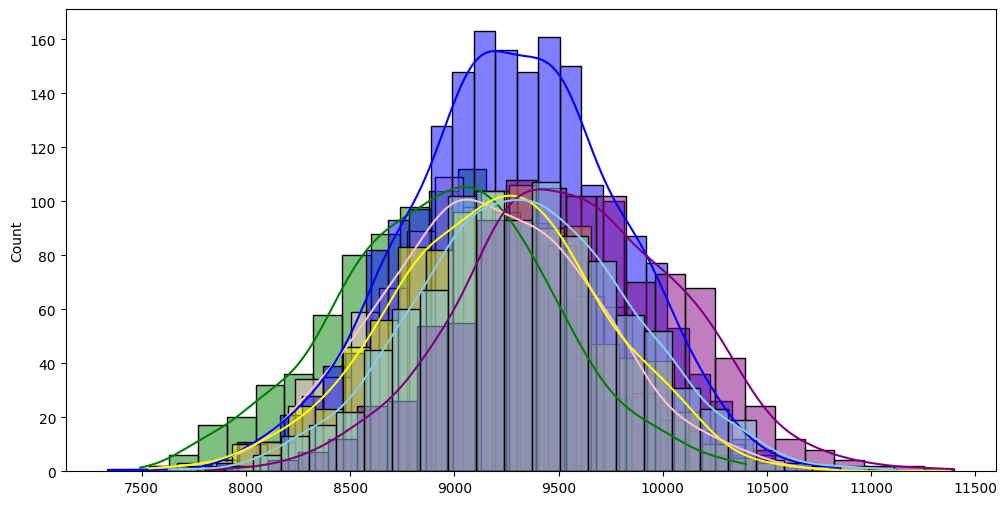

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x=age_0_17_mean, color='green', kde=True)
sns.histplot(x=age_18_25_mean, color='pink', kde=True)
sns.histplot(x=age_26_35_mean, color='blue', kde=True)
sns.histplot(x=age_36_45_mean, color='red', kde=True)
sns.histplot(x=age_46_50_mean, color='yellow', kde=True)
sns.histplot(x=age_51_55_mean, color='purple', kde=True)
sns.histplot(x=age_55_plus_mean, color='skyblue', kde=True)
plt.show()

**Calculating 90% confidence interval**

In [ ]:
for i in age_group:
  temp_df = df[df['Age'] == i]
  age_lower_lim = temp_df['Purchase'].mean() - 1.64 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  age_upper_lim = temp_df['Purchase'].mean() + 1.64 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  print("({:.2f}, {:.2f}) covers 90% of the values of the average spending of {} age customers".format(age_lower_lim, age_upper_lim,i))

(8865.26, 9001.67) covers 90% of the values of the average spending of 0-17 age customers
(9143.51, 9195.82) covers 90% of the values of the average spending of 18-25 age customers
(9235.15, 9270.23) covers 90% of the values of the average spending of 26-35 age customers
(9306.51, 9356.19) covers 90% of the values of the average spending of 36-45 age customers
(9170.52, 9246.73) covers 90% of the values of the average spending of 46-50 age customers
(9492.29, 9577.33) covers 90% of the values of the average spending of 51-55 age customers
(9280.23, 9392.33) covers 90% of the values of the average spending of 55+ age customers


**Calculating 95% confidence interval**

In [ ]:
for i in age_group:
  temp_df = df[df['Age'] == i]
  age_lower_lim = temp_df['Purchase'].mean() - 1.96 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  age_upper_lim = temp_df['Purchase'].mean() + 1.96 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  print("({:.2f}, {:.2f}) covers 95% of the values of the average spending of {} age customers".format(age_lower_lim, age_upper_lim,i))

(8851.95, 9014.98) covers 95% of the values of the average spending of 0-17 age customers
(9138.41, 9200.92) covers 95% of the values of the average spending of 18-25 age customers
(9231.73, 9273.65) covers 95% of the values of the average spending of 26-35 age customers
(9301.67, 9361.03) covers 95% of the values of the average spending of 36-45 age customers
(9163.08, 9254.17) covers 95% of the values of the average spending of 46-50 age customers
(9483.99, 9585.63) covers 95% of the values of the average spending of 51-55 age customers
(9269.30, 9403.26) covers 95% of the values of the average spending of 55+ age customers


**Calculating 99% confidence interval**

In [ ]:
for i in age_group:
  temp_df = df[df['Age'] == i]
  age_lower_lim = temp_df['Purchase'].mean() - 2.58 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  age_upper_lim = temp_df['Purchase'].mean() + 2.58 * temp_df['Purchase'].std()/np.sqrt(len(temp_df))
  print("({:.2f}, {:.2f}) covers 99% of the values of the average spending of {} age customers".format(age_lower_lim, age_upper_lim,i))

(8826.16, 9040.77) covers 99% of the values of the average spending of 0-17 age customers
(9248.11, 9424.45) covers 99% of the values of the average spending of 55+ age customers
(9225.10, 9280.28) covers 99% of the values of the average spending of 26-35 age customers
(9148.68, 9268.57) covers 99% of the values of the average spending of 46-50 age customers
(9467.92, 9601.70) covers 99% of the values of the average spending of 51-55 age customers
(9292.28, 9370.42) covers 99% of the values of the average spending of 36-45 age customers
(9128.52, 9210.81) covers 99% of the values of the average spending of 18-25 age customers


### **Insights:**

🎯 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

🎯 75% of the users are Male and 25% are Female

🎯 60% Single, 40% Married

🎯 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

🎯 Total of 20 product categories are there

🎯 There are 20 differnent types of occupations in the city

🎯 Most of the users are Male

🎯 There are 20 different types of Occupation and Product_Category

🎯 More users belong to B City_Category

🎯 More users are Single as compare to Married

🎯 Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

### **Recommendations:**
🎯 Men spent more money than women, So company should focus on retaining the male
customers and getting more male customers.

🎯 Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these
are the products in these categories are liked more by customers. Company can focus on
selling more of these products or selling more of the products which are purchased less.

🎯 Unmarried customers spend more money than married customers, So company should
focus on acquisition of Unmarried customers.

🎯 Customers in the age 18-45 spend more money than the others, So company should
focus on acquisition of customers who are in the age 18-45

🎯 Male customers living in City_Category C spend more money than other male customers
living in B or C, Selling more products in the City_Category C will help the company
increase the revenue.

🎯 Marketing strategies to address the specific spending patterns observed in different demographics.
Focus on promotions and product offerings that align with the preferences of each group.

🎯 Adjust inventory levels based on the observed spending patterns.
Ensure sufficient stock for products popular among specific groups.

🎯 Implement targeted loyalty programs or incentives based on customer demographics.
Enhance customer engagement by addressing the unique needs of each segment.

🎯 Modify store layouts or online experiences to cater to the preferences of specific demographics.
Create a shopping environment that resonates with the identified customer groups.
By understanding and leveraging these insights, Walmart can optimize its offerings, enhance customer satisfaction, and drive business growth.

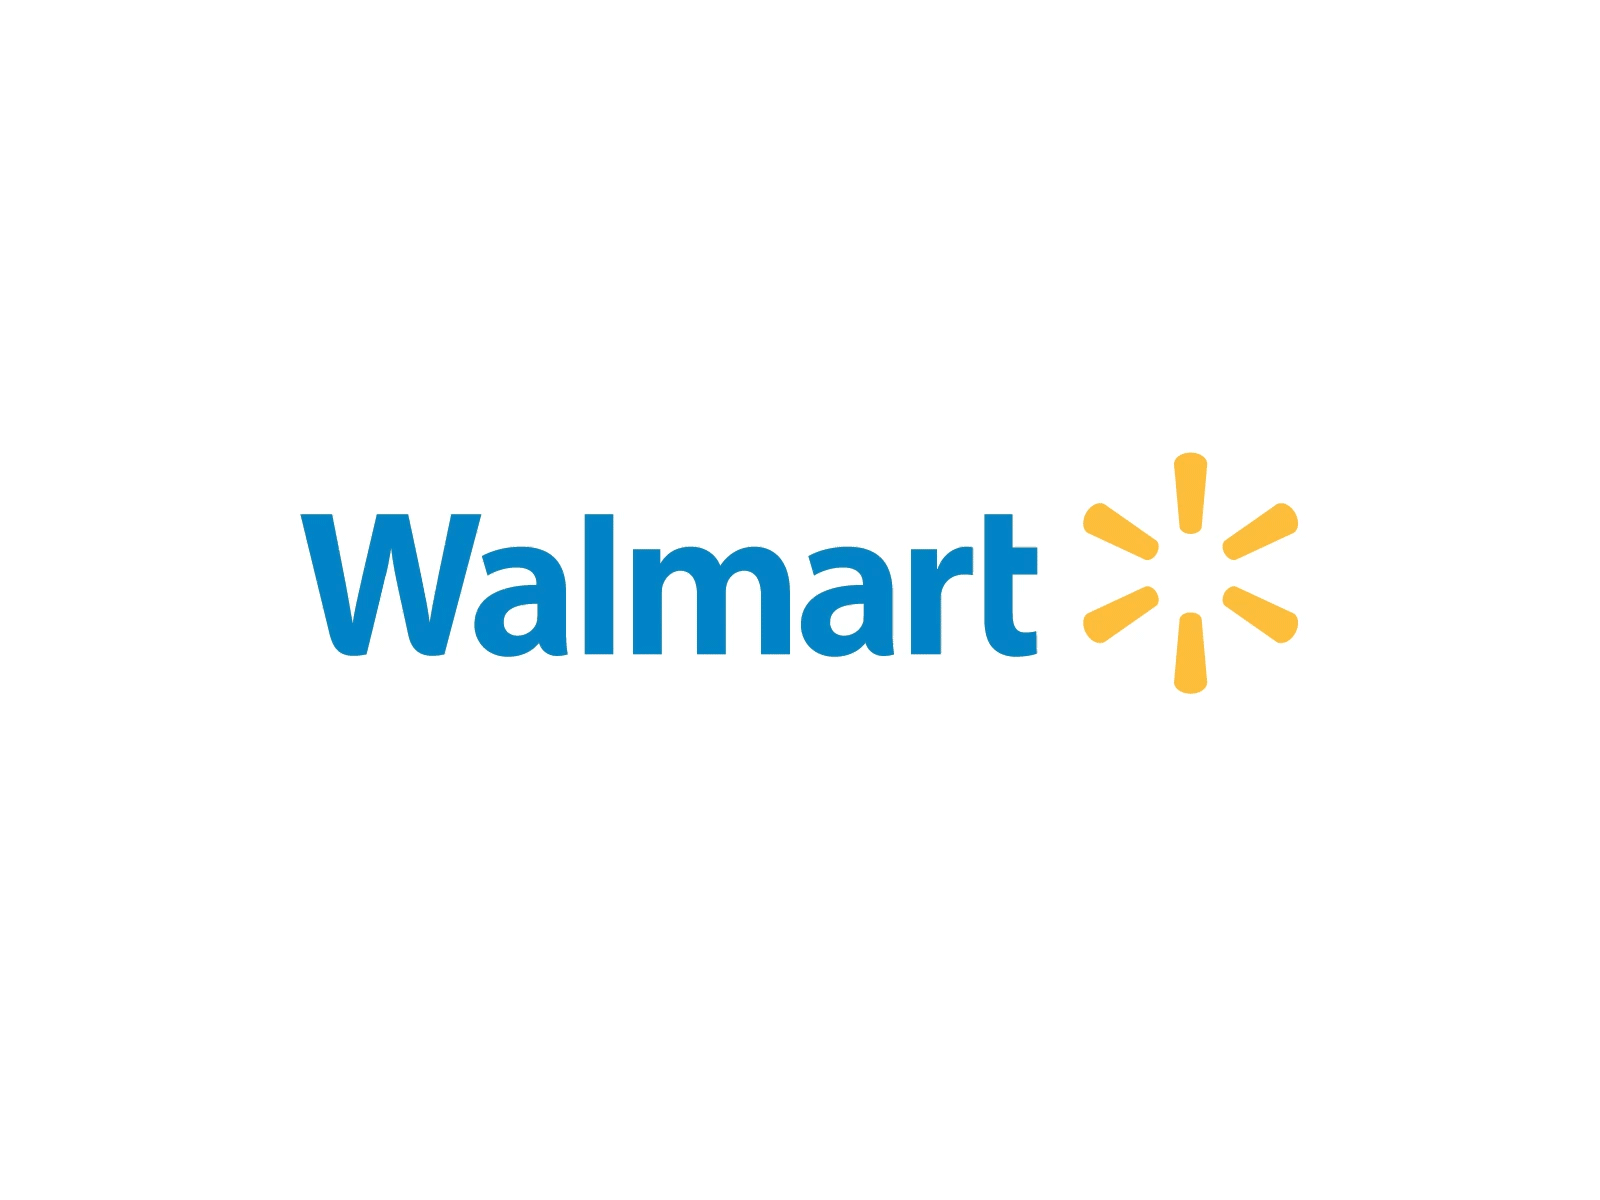

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Walmart_Data.csv')
print(df.shape)
df.head()

(550068, 10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<Axes: xlabel='Gender', ylabel='Purchase'>

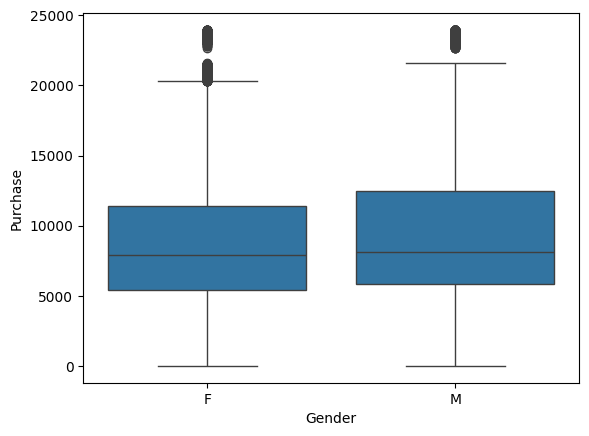

In [ ]:
sns.boxplot(x = "Gender", y = "Purchase", data = df)

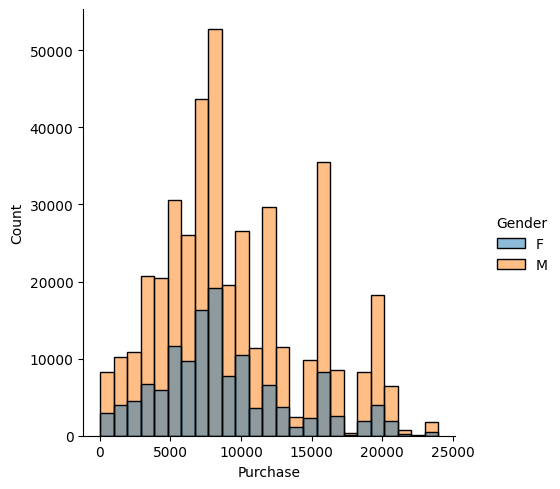

In [ ]:
sns.displot(hue = "Gender", x = "Purchase", data = df, bins = 25)

In [ ]:
# CLT
# 1) Sample
# 2) mean of sample
# 3) Repeat 1 & 2 for some time

In [ ]:
n = 300
iterations = 1000

In [ ]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,82.0,8742.487805,4378.793808,363.0,5983.75,8107.0,10469.25,20957.0
M,218.0,9968.802752,5137.045410,941.0,6059.50,8232.0,15122.50,23104.0


In [ ]:
df.sample(300).groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,78.0,9561.282051,4908.298504,753.0,6084.00,8212.5,12938.75,20865.0
M,222.0,8798.648649,4975.152494,37.0,5516.75,7810.5,11601.00,20603.0


In [ ]:
n = 300
iterations = 1000

In [ ]:
# 300, 600, 1200, 2400, 4800 [Sample Size (n)]
# until you get a bell curse [Iteration]

In [ ]:
df_filtered = df[df.Gender == "M"]
male_spends = []
for i in range(iterations):
  male_spends.append(df_filtered.sample(n).Purchase.mean())

In [ ]:
np.mean(male_spends)

9428.938390000001

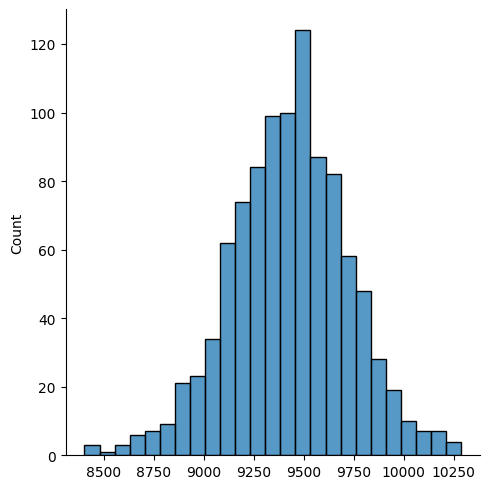

In [ ]:
sns.displot(x = male_spends, bins = 25)

In [ ]:
# list comprehension
sq_num = [num**2 for num in range(1,6)]
sq_num

[1, 4, 9, 16, 25]

In [ ]:
female_spends = [df[df.Gender == "F"].sample(n).Purchase.mean() for i in range(iterations)]
print(np.mean(female_spends))

8733.96852


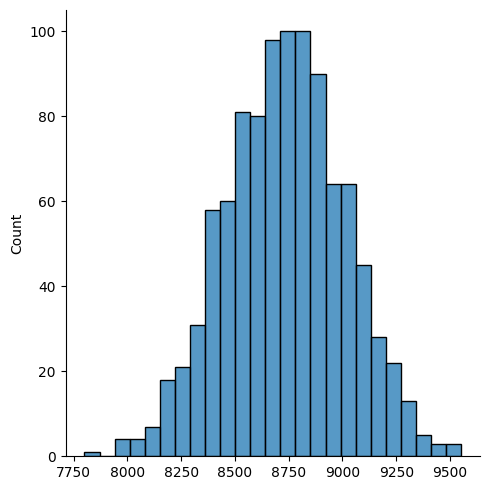

In [ ]:
sns.displot(x = female_spends, bins = 25)

In [ ]:
# Confidence interval, confidence level = 95 %
# 1 : percentile method
# 2 : z score method

In [ ]:
# percentile method
print("Male Spends : ", np.percentile(male_spends, [2.5, 97.5]))
print("Female Spends : ", np.percentile(female_spends, [2.5, 97.5]))

Male Spends :  [ 8838.96416667 10004.06508333]
Female Spends :  [8198.29758333 9261.77558333]


In [ ]:
# Z Score
# min = mean - 1.96* std_error >> std_error = std_pop / root(n) = mean_sample >> n
# min = mean - 1.96*std
# max = mean - 1.96*std

In [ ]:
print("Male Spends : ", (np.mean(male_spends) - 1.96*np.std(male_spends), np.mean(male_spends) + 1.96*np.std(male_spends)))
print("Female Spends : ", (np.mean(female_spends) - 1.96*np.std(female_spends), np.mean(female_spends) + 1.96*np.std(female_spends)))

Male Spends :  (8854.347423946854, 10003.529356053148)
Female Spends :  (8192.550634312016, 9275.386405687985)
